<a href="https://colab.research.google.com/github/mdminhajnoori/Md_Minhaj_Noori_Capstone_projects/blob/main/Md_Minhaj_Noori_Zomato_Restaurant_Clustering_And_Sentiment_Analysis_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Zomato Restaurant Clustering And Sentiment Analysis**

##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
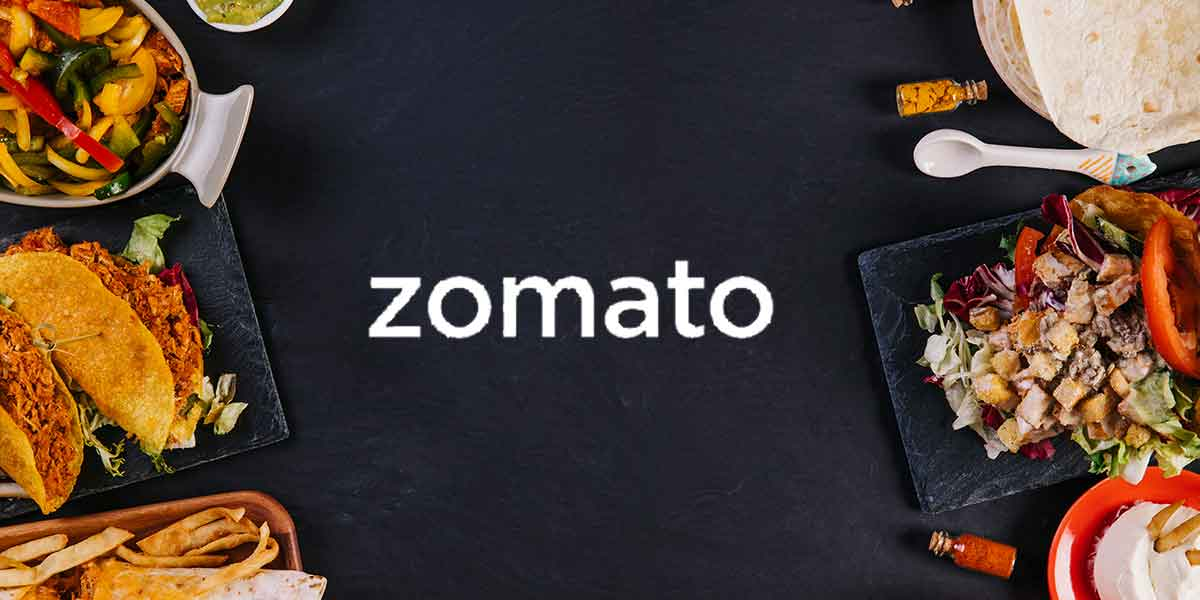

# **Project Summary -**

**Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus, and user reviews of restaurants, and also has food delivery options from partner restaurants in select cities. India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. The restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts, and figures about the Indian food industry in each city. So, this project focuses on analyzing the Zomato restaurant data for each city in India.**

# **GitHub Link -**

https://github.com/mdminhajnoori/Md_Minhaj_Noori_Capstone_projects

# **Problem Statement**


**The Project focuses on Customers and the Company, we have to analyze the sentiments of the reviews given by the customer in the data and make some useful conclusions in the form of Visualizations. Also, cluster the Zomato restaurants into different segments. The data is visualized as it becomes easy to analyze data in at instant. The Analysis also solves some of the business cases that can directly help the customers find the Best restaurant in their locality and for the company to grow up and work in the fields they are currently lagging in. This could help in clustering the restaurants into segments. Also, the data has valuable information about cuisine and cost which can be used in cost vs. benefit analysis Data could be used for sentiment analysis. Also, the metadata of reviewers can be used for identifying the critics in the industry.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [6]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [7]:
pip install contractions

In [8]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import missingno as miss
import contractions
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Dataset Loading

In [9]:
from google.colab import files

# This will prompt you to upload a file
uploaded = files.upload()


Saving Zomato Restaurant reviews.csv to Zomato Restaurant reviews (1).csv
Saving Zomato Restaurant names and Metadata.csv to Zomato Restaurant names and Metadata (1).csv


In [10]:
import pandas as pd
print(pd.__version__)


2.2.2


In [11]:
import pickle
import pandas as pd
# 📄 Load the metadata CSV
hotel_df = pd.read_csv("Zomato Restaurant names and Metadata.csv")
# 🗣️ Load the review data
review_df = pd.read_csv("Zomato Restaurant reviews.csv")

# Then save it
pickle.dump(hotel_df, open('df.pkl', 'wb'))


In [12]:
data = pickle.load(open('df.pkl','rb'))

In [13]:
data.iloc[0]

,0
Name,Beyond Flavours
Links,https://www.zomato.com/hyderabad/beyond-flavou...
Cost,800
Collections,"Food Hygiene Rated Restaurants in Hyderabad, C..."
Cuisines,"Chinese, Continental, Kebab, European, South I..."
Timings,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"


# First Dataset View

In [14]:
# first dataset Look
print("Hotel Data:")
display(hotel_df.head())


Hotel Data:


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


# Second Dataset View

In [15]:
print("Review Data:")
display(review_df.head())


Review Data:


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [16]:
# Dataset Rows & Columns count
print('The number of rows in first df is',len(hotel_df.index),'and number of columns is',len(hotel_df.columns))
print('The number of rows in second df is',len(review_df.index),'and number of columns is',len(review_df.columns))

The number of rows in first df is 105 and number of columns is 6
The number of rows in second df is 10000 and number of columns is 7


### Dataset Information

In [17]:
# Dataset Info
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [18]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [19]:
# Dataset Duplicate Value Count
print('The number of duplicated values in first df is',hotel_df.duplicated().sum())
print('The number of duplicated values in second df is',review_df.duplicated().sum())


The number of duplicated values in first df is 0
The number of duplicated values in second df is 36


#### Missing Values/Null Values

In [20]:
# Missing Values/Null Values Count
hotel_df.isnull().sum()


,0
Name,0
Links,0
Cost,0
Collections,54
Cuisines,0
Timings,1


In [21]:
review_df.isnull().sum()

,0
Restaurant,0
Reviewer,38
Review,45
Rating,38
Metadata,38
Time,38
Pictures,0


<Axes: >

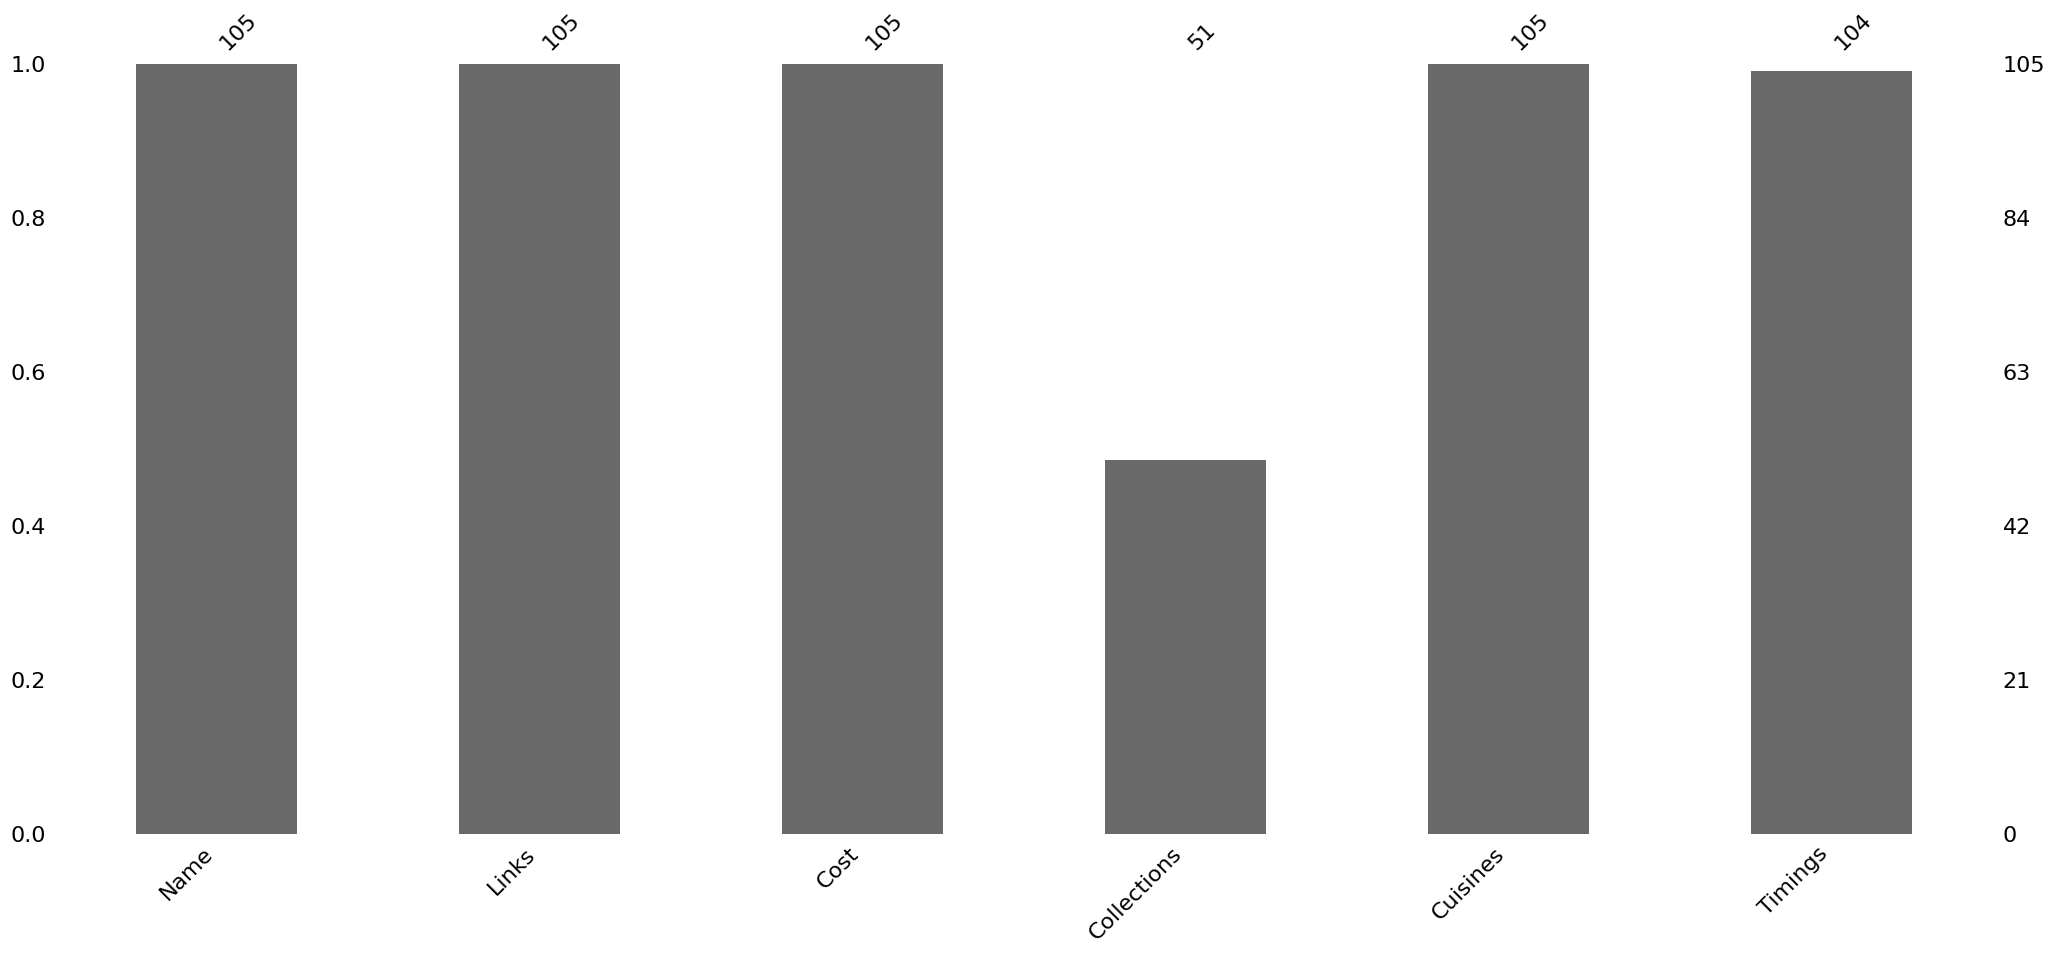

In [22]:
# Visualizing the missing values
import missingno as miss

# Now this will work:
miss.bar(hotel_df)


<Axes: >

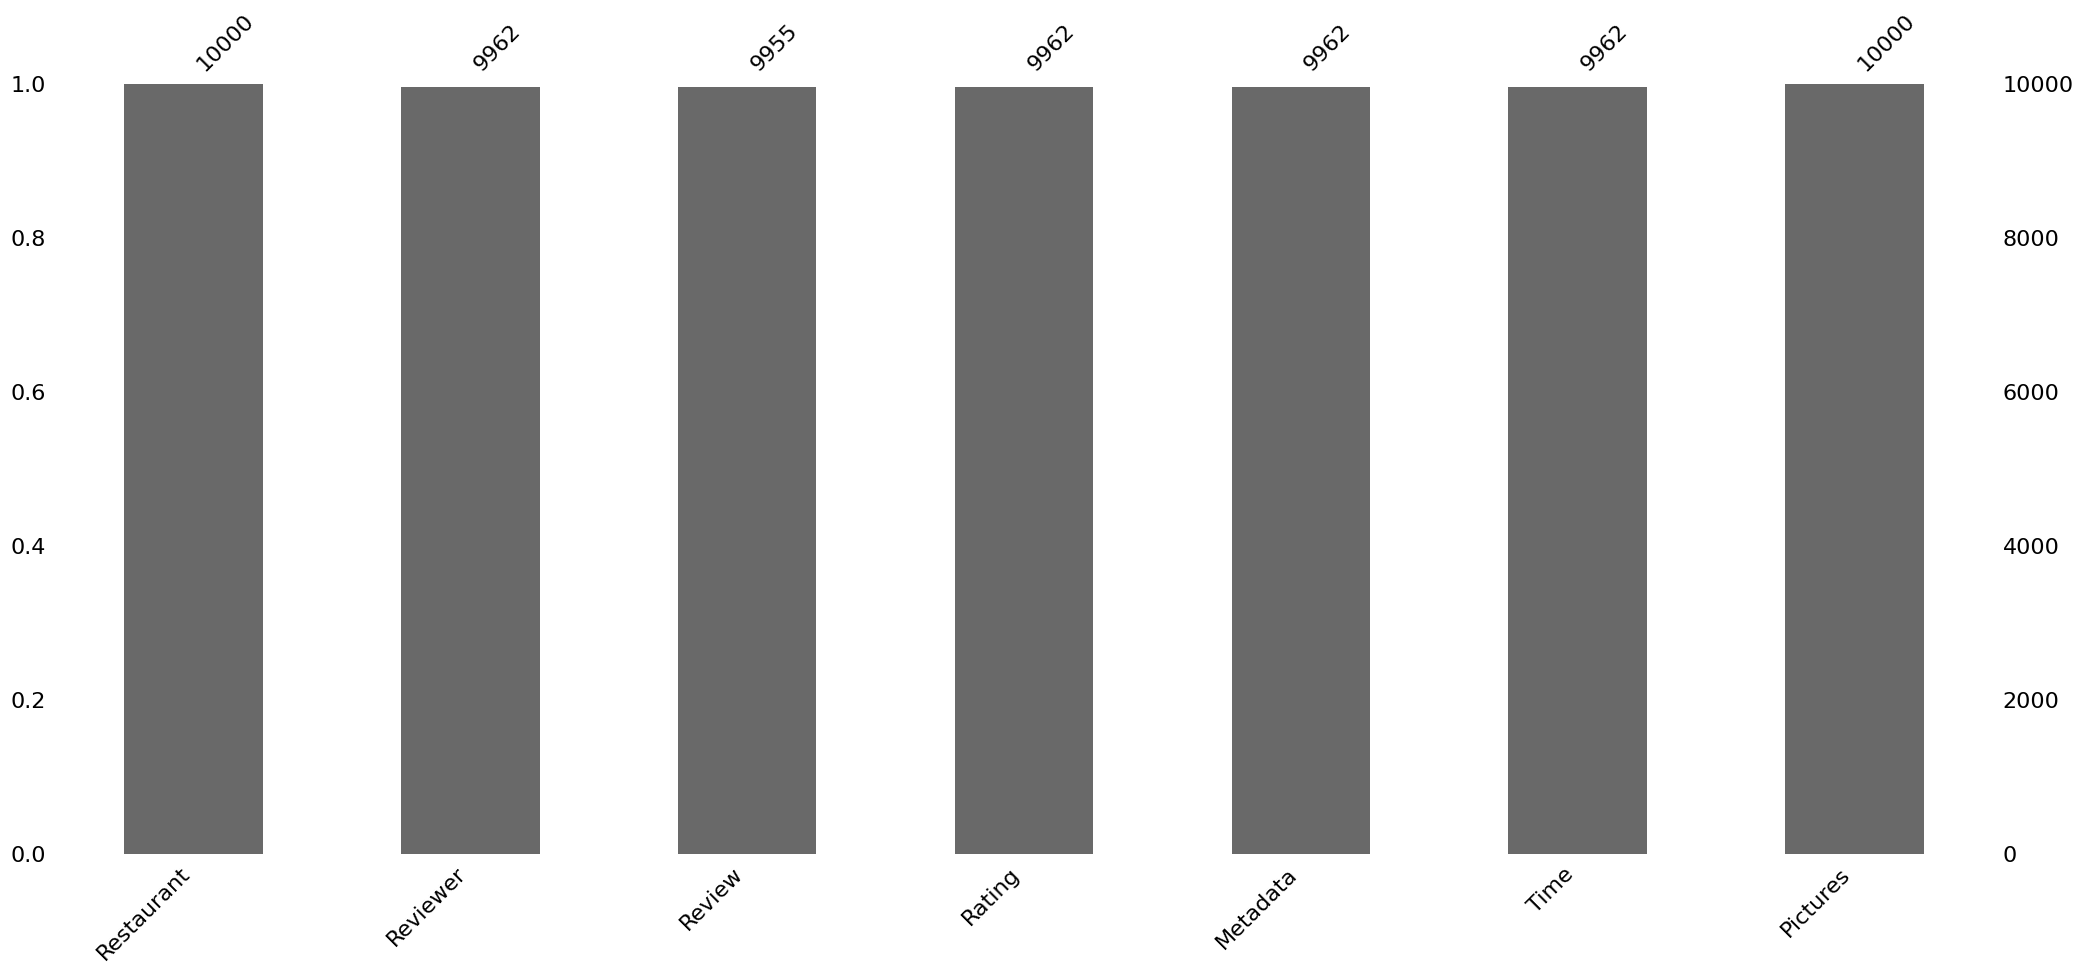

In [23]:
import missingno as miss
miss.bar(review_df)

### What did you know about your dataset?

**The First Dataset contains 54 null values in Collections column and 1 in Timings. Rest of the columns do not contain any null values. In Second Dataset contains 38 null values in Reviewer, 45 null values in Review, 38 null values in Rating, 38 null values in Metadata, 38 null values in Time.\
As we are analysing the Zomato-Restaurant, our classification model will be trained mostly on ratings.**

## ***2. Understanding Your Variables***

In [24]:
# Dataset Columns
hotel_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [25]:
review_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [26]:
# Dataset Describe
hotel_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [27]:
review_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


So describe function is not so important here because, the features are not so important for the classification.

### Variables Description

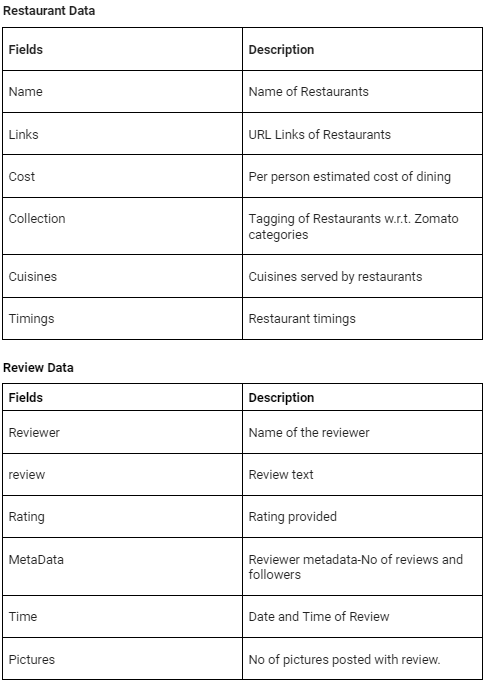

### Check Unique Values for each variable.

In [28]:
# Check Unique Values for each variable.
for I in hotel_df.columns:
  print(f'Th number of unique values in the column {I} is {hotel_df[I].nunique()} ')

Th number of unique values in the column Name is 105 
Th number of unique values in the column Links is 105 
Th number of unique values in the column Cost is 29 
Th number of unique values in the column Collections is 42 
Th number of unique values in the column Cuisines is 92 
Th number of unique values in the column Timings is 77 


In [29]:
for I in review_df.columns:
  print(f'Th number of unique values in the column {I} is {review_df[I].nunique()} ')

Th number of unique values in the column Restaurant is 100 
Th number of unique values in the column Reviewer is 7446 
Th number of unique values in the column Review is 9364 
Th number of unique values in the column Rating is 10 
Th number of unique values in the column Metadata is 2477 
Th number of unique values in the column Time is 9782 
Th number of unique values in the column Pictures is 36 


## 3. ***Data Wrangling***

### Data Wrangling Code

In [30]:
class Machine_Learning:
    """
    Machine Learning class to train and evaluate a model
    using training and testing datasets
    """
    def __init__(self , model ,X_train, X_test, y_train, y_test):
        """
        Initialize the model
        :param model: Machine Learning model
        Train and evaluate the machine learning model on the given datasets
        :param X_train: Training data
        :param X_test: Testing data
        :param y_train: Target variable for training data
        :param y_test: Target variable for testing data
        """
        self.model = model()
        self.X_train = X_train
        self.Y_train = y_train
        self.X_test = X_test
        self.Y_test = y_test


    def train_and_evaluate_machine(self,Model_name):

        # Instantiate the classifier and fit to the training data
        model =  self.model
        model.fit(self.X_train, self.Y_train)

        # Compute the training and testing accuracy
        train_accuracy = accuracy_score(self.Y_train, model.predict(self.X_train))
        test_accuracy = accuracy_score(self.Y_test, model.predict(self.X_test))

        # Print the accuracy scores
        print(f'Training accuracy for the given Model is : {train_accuracy}')
        print(f'Testing accuracy for the given Model is : {test_accuracy}')

        print(' ')
        # Print the Classification Report
        print(classification_report(self.Y_test, model.predict(self.X_test)))

        # Compute and plot the confusion matrix
        confusion = confusion_matrix(self.Y_test, model.predict(self.X_test))
        plt.figure(figsize=(6,5))
        sns.heatmap(confusion, annot=True)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion matrix for {Model_name}')
        plt.show()

    def Cross_validation(self , para_dict):
        """
        Perform cross-validation to find the best hyperparameters for the model
        :param para_dict: Hyperparameters for the model
        """

        self.model_cv = RandomizedSearchCV( self.model,n_iter=10, param_distributions = para_dict ,verbose = 5 , cv = 3, return_train_score= True)
        self.model_cv.fit(self.X_train, self.Y_train)
        print(' ')
        print(self.model_cv.best_params_)

In [31]:
# Write your code to make your dataset analysis ready.
hotel_df

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


In [32]:
review_df

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [33]:
review_df[review_df['Rating']=='Like']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


In [ ]:
avg = 4
for i in review_df[review_df['Restaurant'] == 'The Old Madras Baking Company']['Rating']:
    if i != 'Like':
        avg += float(i)
avg_mean = avg / len(review_df[review_df['Restaurant'] == 'The Old Madras Baking Company']['Rating'])
review_df['Rating'][review_df['Rating'] == 'Like'] = avg_mean
review_df.loc[review_df['Rating'] == 'Like', 'Rating'] = avg_mean
review_df['Rating'] = review_df['Rating'].astype(float)


### What all manipulations have you done and insights you found?

Step 1: Averaged ratings from one restaurant (excluding 'Like')

Action: Calculated the mean rating for The Old Madras Baking Company, ignoring 'Like' values.

Impact: Gave a partial summary statistic based on a subset of the data.

Step 2: Replaced all 'Like' values with that average across the full dataset

Action: Used the average from one restaurant to replace 'Like' ratings everywhere.

Impact: Caused inconsistent imputation, which could introduce bias in the ratings of other restaurants.

Step 3: Converted the 'Rating' column to float

Action: Ensured all values in the column are numeric.

Impact: Made the data ready for statistical analysis and machine learning models.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Restaurants and their Ratings

In [34]:
# Chart - 1 visualization code
rating=review_df.groupby('Restaurant')['Rating'].sum().reset_index().sort_values(by = 'Rating',ascending = False)
rating

,Restaurant,Rating
2,"3B's - Buddies, Bar & Barbecue",5555555555555555555555555555555555555555555555...
87,The Indi Grill,5555555555555544552455535455355555555555545525...
64,Over The Moon Brew Company,5555555555545455444511545555555544145554533145...
16,Beyond Flavours,5555555455555515455554455555543555555554554453...
27,Dine O China,5555555442444325355255555555515255444411414315...
...,...,...
34,Feast - Sheraton Hyderabad Hotel,1145351455554444535544555444451112314554145555...
91,Tiki Shack,1143544324414423544533544243541144141454544515...
78,Shree Santosh Dhaba Family Restaurant,1133213111151411121133111121515215141151554455...
26,Desi Bytes,1114333534155445534551153415153341412213551124...


Text(0.5, 1.0, 'Restaurant ratings')

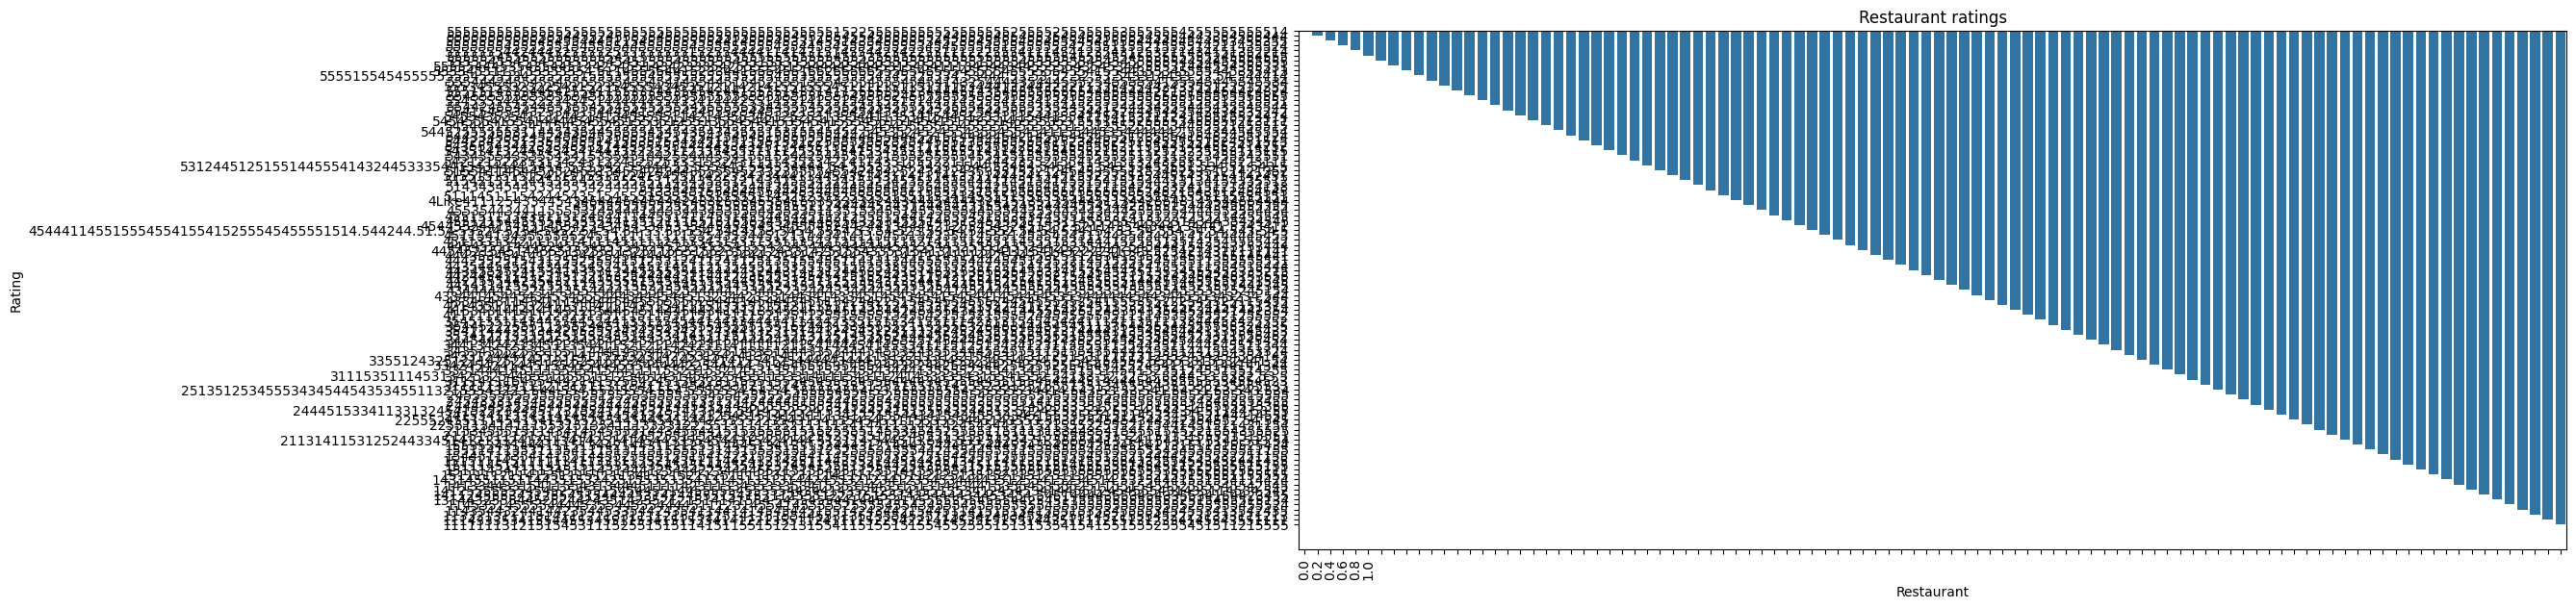

In [37]:
# # Chart - 1 visualization code
fig, ax = plt.subplots(figsize=(17, 7))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.barplot(rating, x = "Restaurant", y = "Rating")
plt.xlabel('Restaurant')
plt.ylabel('Rating')
plt.title('Restaurant ratings')

#### Chart - 2

In [38]:
# Chart - 2 visualization code
cost = hotel_df.groupby('Name')['Cost'].sum().reset_index().rename(columns = {'Name':'Restaurant'})
cost

,Restaurant,Cost
0,10 Downing Street,"1,900"
1,13 Dhaba,450
2,"3B's - Buddies, Bar & Barbecue","1,100"
3,AB's - Absolute Barbecues,"1,500"
4,Absolute Sizzlers,750
...,...,...
100,Wich Please,250
101,Yum Yum Tree - The Arabian Food Court,"1,200"
102,Zega - Sheraton Hyderabad Hotel,"1,750"
103,Zing's Northeast Kitchen,550


In [39]:
# sns.barplot(cost, x="Restaurant", y= "Cost")
# plt.title('Restaurant Cost')
# plt.xlabel('Rastaurant')
# plt.ylabel('Cost')

#### Chart - 3

In [40]:
# Chart - 3 visualization code
comapre_df= pd.merge(cost,rating , on ='Restaurant',how = 'inner').sort_values(by = 'Rating',ascending = False).iloc[:15]
comapre_df

,Restaurant,Cost,Rating
2,"3B's - Buddies, Bar & Barbecue","1,100",5555555555555555555555555555555555555555555555...
87,The Indi Grill,"1,500",5555555555555544552455535455355555555555545525...
64,Over The Moon Brew Company,"1,200",5555555555545455444511545555555544145554533145...
16,Beyond Flavours,800,5555555455555515455554455555543555555554554453...
27,Dine O China,850,5555555442444325355255555555515255444411414315...
11,B-Dubs,"1,600",5555554555555555555545155555555555555555555555...
67,Paradise,800,5555545545545555555454515554555555455155355555...
90,The Tilt Bar Republic,"1,500",5555544453543544514425455143423335425553351544...
71,Prism Club & Kitchen,"1,200",5555455113155555554.51145555441523344155545515...
19,Cascade - Radisson Hyderabad Hitec City,"1,800",5555155454555555554555334555555155535554555555...


<Axes: xlabel='Cost', ylabel='Rating'>

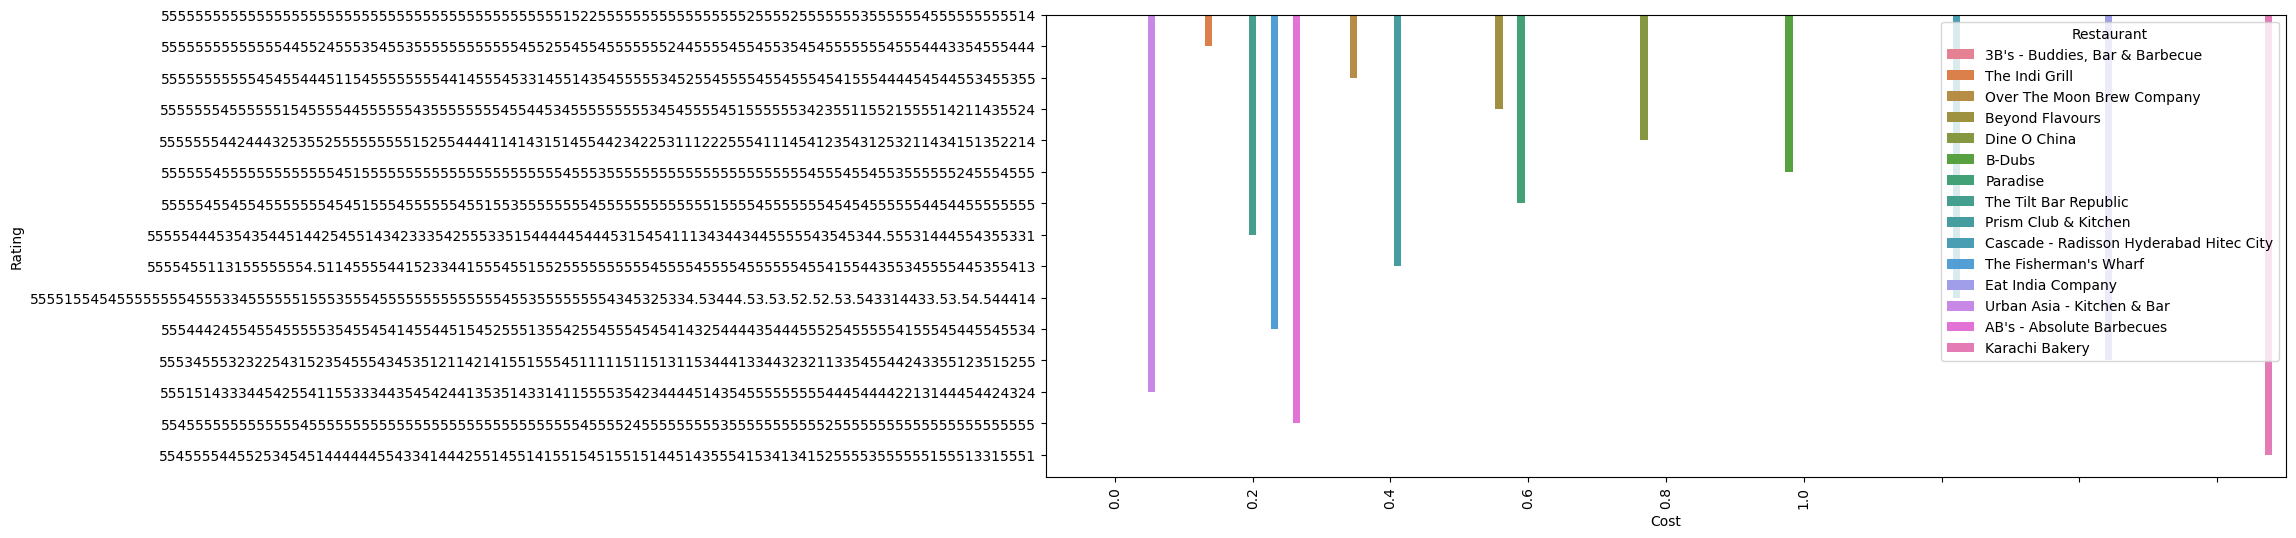

In [41]:
fig,ax = plt.subplots(figsize = [16,6])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.barplot(x=comapre_df['Cost'], y= comapre_df['Rating'],hue = comapre_df['Restaurant'])

#### Chart - 4

In [42]:
review_df['Metadata'][8777] = 0,0

In [43]:
meta_df = review_df[~review_df['Metadata'].isnull()]
meta_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [44]:
meta_df['interaction'] = meta_df['Metadata'].apply(lambda x : x[0]+x[1])
meta_df['interaction'] =meta_df['interaction'].astype(int)

In [45]:
# Chart - 4 visualization code
meta_df['interaction']

,interaction
0,1
1,3
2,2
3,1
4,3
...,...
9995,53
9996,2
9997,65
9998,13


## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [46]:
# Handling Missing Values & Missing Value Imputation
(hotel_df.isnull().sum()/len(hotel_df['Collections'])*100).round(2)

,0
Name,0.00
Links,0.00
Cost,0.00
Collections,51.43
Cuisines,0.00
Timings,0.95


In [48]:
hotel_df.fillna(' ',inplace = True)

In [49]:
(review_df.isnull().sum()/len(review_df['Metadata']))

,0
Restaurant,0.0000
Reviewer,0.0038
Review,0.0045
Rating,0.0038
Metadata,0.0037
Time,0.0038
Pictures,0.0000


In [50]:
review_df.dropna(inplace = True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

**There are 1 columns in the first dataset which shows the null values. Their are 51 instances where the Collections is missing. Certainly these missing values do not impact the other information related with the title. So I replaced all the null values with blank string, so that we could use the remaining information of the movies.**

### 4. Textual Data Preprocessing for Content Based Filtering
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [51]:
def natural_language_processing(text):
    # Fix contractions
    first = contractions.fix(text)

    # Remove URLs
    without_urls = re.sub(r'http\S+|www\S+', '', first)

    # Convert to lowercase
    second = without_urls.lower()

    # Remove punctuation
    punct = set(string.punctuation)
    third = ''.join([i for i in second if i not in punct])

    # Remove white spaces
    fourth = re.sub('\s+', ' ', third).strip()

    # Remove stopwords
    stop = set(stopwords.words('english'))
    fifth = ' '.join([i for i in fourth.split() if i not in stop])

    # Tokenize words
    word_tokens = word_tokenize(fifth)

    # Replace words with synonyms
    rephrased_sentence = []
    for word in word_tokens:
        synonyms = wordnet.synsets(word)
        if len(synonyms) > 0:
            wor = synonyms[0].lemmas()[0].name()
        else:
            wor = word
        rephrased_sentence.append(wor)

    # Join rephrased words
    sixth = ' '.join(rephrased_sentence)

    # Tokenize words again
    seventh = word_tokenize(sixth)

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    eighth = ' '.join([lemmatizer.lemmatize(i) for i in seventh])

    return eighth


#### **Beginning of the Content based filtering**

In [52]:
import contractions
import re

def natural_language_processing(text):
    if pd.isna(text):
        return ""

    # Fix contractions
    text = contractions.fix(text)

    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Strip extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [53]:
hotel_df['tags'] = hotel_df['Links'] + hotel_df['Collections'] + hotel_df['Cuisines']
hotel_df['new_tags'] = hotel_df['tags'].apply(natural_language_processing)


#### 10. Text Vectorization

In [54]:
# # Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine text columns if not already done
hotel_df['tags'] = hotel_df['Links'].fillna('') + ' ' + hotel_df['Collections'].fillna('') + ' ' + hotel_df['Cuisines'].fillna('')

# Define a basic cleaning function
import re
import contractions

def natural_language_processing(text):
    if pd.isna(text):
        return ""
    text = contractions.fix(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return re.sub(r'\s+', ' ', text).strip()

# Apply NLP cleaning
hotel_df['new_tags'] = hotel_df['tags'].apply(natural_language_processing)

# Vectorize using TF-IDF
tfidf = TfidfVectorizer()
hotel_bag_tf = tfidf.fit_transform(hotel_df['new_tags'].fillna('')).toarray()



In [55]:
hotel_bag_tf.shape

(105, 117)

In [56]:
words=hotel_bag_tf.sum(axis = 0)
high_word =sorted(words,reverse =  True)

index_wor= np.flip(np.argsort(words))[:15]
index_wor
res_array=np.zeros([index_wor.shape[0],words.shape[0]])
res_array.shape

(15, 117)

In [57]:
for i,j in enumerate(index_wor):
  res_array[i,j] = 1
high_freq_words=tfidf.inverse_transform(res_array)
high_freq_words

[array(['indian'], dtype='<U13'),
 array(['north'], dtype='<U13'),
 array(['chinese'], dtype='<U13'),
 array(['food'], dtype='<U13'),
 array(['biryani'], dtype='<U13'),
 array(['fast'], dtype='<U13'),
 array(['continental'], dtype='<U13'),
 array(['desserts'], dtype='<U13'),
 array(['asian'], dtype='<U13'),
 array(['italian'], dtype='<U13'),
 array(['bakery'], dtype='<U13'),
 array(['great'], dtype='<U13'),
 array(['south'], dtype='<U13'),
 array(['cafe'], dtype='<U13'),
 array(['andhra'], dtype='<U13')]

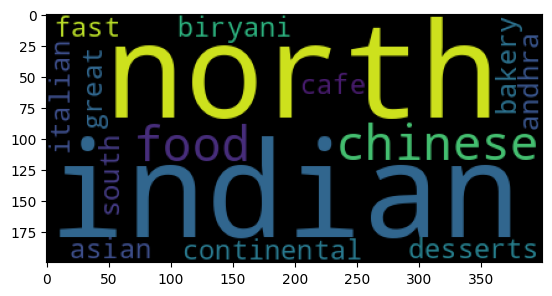

In [58]:
from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud().generate(' '.join([i[0] for i in high_freq_words]))
plt.imshow(wordcloud)

### 5. Textual Data Preprocessing for Sentiment Analysis
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [59]:
def natural_language_processing(text):

    # Fix contractions
    first = contractions.fix(text)

    # Remove URLs
    without_urls = re.sub(r'http\S+|www\S+', '', first)

    # Convert to lowercase
    second = without_urls.lower()

    # Remove punctuation
    punct = set(string.punctuation)
    third = ''.join([i for i in second if i not in punct])

    # Remove white spaces
    fourth = re.sub('\s+', ' ', third).strip()

    # Remove stopwords
    stop = set(stopwords.words('english'))
    fifth = ' '.join([i for i in fourth.split() if i not in stop])

    # Tokenize words
    word_tokens = word_tokenize(fifth)

    # Replace words with synonyms
    rephrased_sentence = []
    for word in word_tokens:
        synonyms = wordnet.synsets(word)
        if len(synonyms) > 0:
            wor = synonyms[0].lemmas()[0].name()
        else:
            wor = word
        rephrased_sentence.append(wor)

    # Join rephrased words
    sixth = ' '.join(rephrased_sentence)

    # Tokenize words again
    seventh = word_tokenize(sixth)

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    eighth = ' '.join([lemmatizer.lemmatize(i) for i in seventh])

    return eighth


#### **Beginning of the Sentiment Analysis**

In [60]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [61]:
import pandas as pd
import re
import contractions
import string  # <-- this is the missing import

# Define the text-cleaning function
def natural_language_processing(text):
    if pd.isna(text):
        return ""

    # Expand contractions (e.g., can't -> cannot)
    text = contractions.fix(text)

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)

    # Remove punctuation
    punct = set(string.punctuation)
    text = ''.join([char for char in text if char not in punct])

    # Convert to lowercase
    text = text.lower()

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the cleaning function to the 'Review' column
review_df['tags'] = review_df['Review'].apply(natural_language_processing)


In [62]:
review_df['tags'].values

array(['the ambience was good food was quite good had saturday lunch which was cost effective good place for a sate brunch one can also chill with friends and or parents waiter soumen das was really courteous and helpful',
       'ambience is too good for a pleasant evening service is very prompt food is good over all a good experience soumen das kudos to the service',
       'a must try great food great ambience thnx for the service by pradeep and subroto my personal recommendation is penne alfredo pasta also the music in the background is amazing',
       ...,
       'bad rating is mainly because of chicken bone found in veg food and is not acceptable for a vegetarian to satiate cravings for chinese food we headed to chinese pavilion and there was also a voucher available in little app for luncheon tray for rs 310 veg well do not bother for the voucher as the price for veg luncheon tray is rs 275 taxes in the restaurant itself the ambiance is decent and since it was noon not many tab

#### 10. Text Vectorization

In [63]:
# Vectorizing Text
tfidf2 = TfidfVectorizer()
sentiment_bag=tfidf2.fit_transform(review_df['tags'].values).toarray()

In [64]:
sentiment_bag.shape

(9955, 18757)

In [65]:
sum_words=sentiment_bag.sum(axis = 0)
sorted_freq =sorted(sum_words,reverse =  True)

high_freq_word= np.flip(np.argsort(sum_words))[:15]
high_freq_word
new_array=np.zeros([high_freq_word.shape[0],sum_words.shape[0]])
new_array.shape

(15, 18757)

In [66]:
for i,j in enumerate(high_freq_word):
  new_array[i,j] = 1
most_freq=tfidf2.inverse_transform(new_array)
most_freq

[array(['the'], dtype='<U170'),
 array(['good'], dtype='<U170'),
 array(['and'], dtype='<U170'),
 array(['is'], dtype='<U170'),
 array(['was'], dtype='<U170'),
 array(['to'], dtype='<U170'),
 array(['food'], dtype='<U170'),
 array(['not'], dtype='<U170'),
 array(['it'], dtype='<U170'),
 array(['of'], dtype='<U170'),
 array(['very'], dtype='<U170'),
 array(['for'], dtype='<U170'),
 array(['place'], dtype='<U170'),
 array(['with'], dtype='<U170'),
 array(['in'], dtype='<U170')]

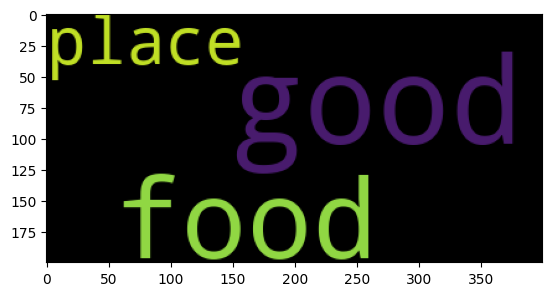

In [67]:
from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud().generate(' '.join([i[0] for i in most_freq]))
plt.imshow(wordcloud)

##### Which text vectorization technique have you used and why?

**WordCLoud is providing a brief idea about the most frequent word. In vectorization I have implemented term frequency and inverse document frequency. So the word good has maximum frequency, followed by food.**

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [68]:
review_df['Rating'].value_counts()

,count
Rating,
5,3826
4,2373
1,1735
3,1192
2,684
4.5,69
3.5,47
2.5,19
1.5,9


In [69]:
# Manipulate Features to minimize feature correlation and create new features
review_df['new_Rating'] = review_df['Rating'].round()

In [70]:
# Step 1: Convert to float first (handles strings like '3.5')
review_df['new_Rating'] = pd.to_numeric(review_df['new_Rating'], errors='coerce')

# Step 2: Drop rows with missing or invalid ratings
review_df = review_df.dropna(subset=['new_Rating'])

# Step 3 (Optional): Convert to integer — if you really want to lose decimals
review_df['new_Rating'] = review_df['new_Rating'].astype(int)
review_df['new_Rating'] = pd.to_numeric(review_df['new_Rating'], errors='coerce')
review_df = review_df.dropna(subset=['new_Rating'])
# Do not convert to int


In [71]:
review_df['new_Rating'].value_counts()

,count
new_Rating,
5,3826
4,2442
1,1744
3,1239
2,703


In [72]:
review_df.replace({'new_Rating':{5:0,4:0,3:0,2:1}},inplace = True)

#### 2. Feature Selection

In [73]:
# Select your features wisely to avoid overfitting
independent_variable = sentiment_bag
dependent_variable = review_df['new_Rating']

### 7. Dimesionality Reduction

In [74]:
 # DImensionality Reduction (If needed)
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import issparse

# Check shape and sparsity
print("Original feature shape:", sentiment_bag.shape)
print("Is sparse matrix:", issparse(sentiment_bag))  # Should return True
# print("Non-zero entries:", sentiment_bag.nnz)
from scipy.sparse import csr_matrix

# Convert to sparse if needed
if not issparse(sentiment_bag):
    sentiment_bag = csr_matrix(sentiment_bag)

print("Non-zero entries:", sentiment_bag.nnz)


# Reduce dimensions (faster settings)
n_components = 1000  # Lowered for speed
svd = TruncatedSVD(n_components=n_components, algorithm='randomized', random_state=42)
reduced_features = svd.fit_transform(sentiment_bag)

# Output
print("Reduced feature shape:", reduced_features.shape)
print(f"Explained variance ratio: {svd.explained_variance_ratio_.sum():.4f}")



Original feature shape: (9955, 18757)
Is sparse matrix: False
Non-zero entries: 355832
Reduced feature shape: (9955, 1000)
Explained variance ratio: 0.7067


In [75]:
reduced_features.shape
pca_features = reduced_features
print(pca_features.shape)

(9955, 1000)


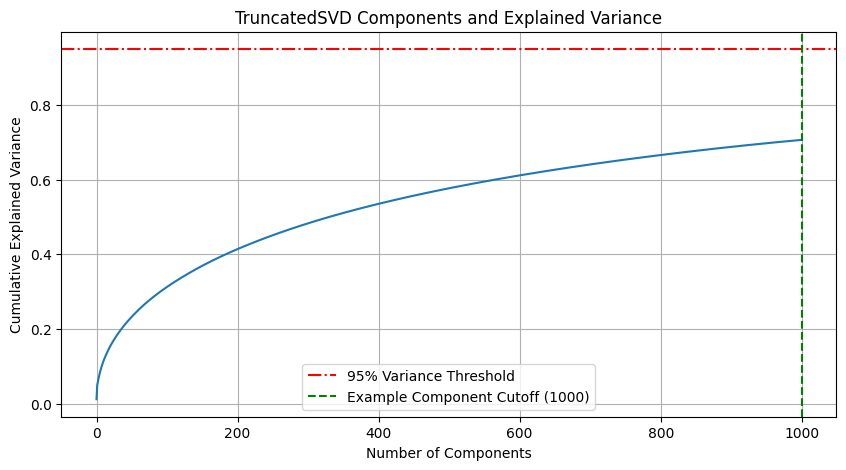

In [76]:
#Analysing the variance for different number of features and plotting the graph

import matplotlib.pyplot as plt
import numpy as np

# Plot cumulative explained variance from TruncatedSVD
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.title('TruncatedSVD Components and Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(0.95, color='r', linestyle='-.', label='95% Variance Threshold')
plt.axvline(1000, color='g', linestyle='--', label='Example Component Cutoff (1000)')
plt.legend()
plt.grid(True)
plt.show()


In [77]:
from sklearn.decomposition import TruncatedSVD

n_components = 300
svd = TruncatedSVD(n_components=n_components, random_state=42)
reduced_features = svd.fit_transform(sentiment_bag)

print("Reduced features shape:", reduced_features.shape)
print("Explained variance ratio:", svd.explained_variance_ratio_.sum())



Reduced features shape: (9955, 300)
Explained variance ratio: 0.48023491482994163


In [78]:
reduced_features.shape

(9955, 300)

### 8. Data Splitting

In [92]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Ensure ratings have no missing values
# 1. Drop rows where 'new_Rating' is missing BEFORE creating features
# Example (your actual code may vary):
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# 1. Drop missing labels
review_df = review_df.dropna(subset=['new_Rating']).reset_index(drop=True)

# 2. Create bag-of-words from 'Review' column
vectorizer = CountVectorizer()
sentiment_bag = vectorizer.fit_transform(review_df['Review'])

# 3. Align features and labels
X = sentiment_bag
y = review_df['new_Rating'].values

# 4. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Check shapes
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


# print(f"sentiment_bag shape: {sentiment_bag.shape}")
# print(f"new_Rating shape: {review_df['new_Rating'].shape}")


(7963, 15066) (1991, 15066)
(7963,) (1991,)


##### What data splitting ratio have you used and why?

A test size of 0.2 is used, which means:

80% training data

20% test data



### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [93]:
# Handling Imbalanced Dataset (If needed)
review_df['new_Rating'].value_counts()

,count
new_Rating,
0,7507
1,2447


In [94]:
from imblearn.over_sampling import SMOTE

x_oversampled, y_oversampled = SMOTE(
    random_state=2023,).fit_resample(X_train ,y_train)

In [95]:
y_oversampled.shape

(12034,)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE (Synthetic Minority Over-sampling Technique) is used to handle the imbalanced dataset.

This dataset likely has class imbalance in the target variable new_Rating (some ratings appear much more frequently than others).

Imbalanced data can cause models to be biased toward majority classes, hurting performance on minority classes.

SMOTE balances the training data by increasing minority samples, improving the model's ability to recognize all classes fairly.

It’s better than simple oversampling because it adds variety rather than exact duplicates.

## ***7. ML Model Implementation***

## Sentiment Analysis

### ML Model - 1

Training accuracy for the given Model is : 0.9960943992022603
Testing accuracy for the given Model is : 0.8779507785032646
 
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1490
           1       0.77      0.74      0.75       501

    accuracy                           0.88      1991
   macro avg       0.84      0.83      0.84      1991
weighted avg       0.88      0.88      0.88      1991



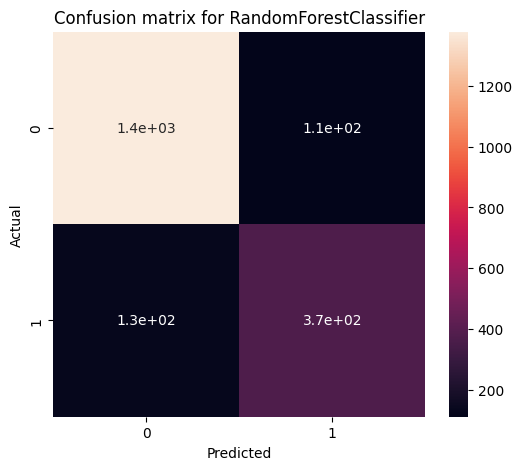

In [96]:
#line of code is calling the function train_and_evaluate_machine() with four arguments:
#The train_and_evaluate_machine() function is responsible for training the model using the training data set and evaluating its
#performance using the test data set. The specific implementation of this function will depend on the algorithm being used.
'''Purpose of this line of code is to use the Multinomial Naive Bayes algorithm to train and evaluate a machine learning
   model using a specific training and test data set. The results of this evaluation
   can then be used to assess the performance of the algorithm and compare it to other algorithms or variations of the same algorithm.'''


# ML Model - 1 Implementation

Ml_model1 = Machine_Learning(RandomForestClassifier,x_oversampled , X_test ,y_oversampled,y_test)

# Fit the Algorithm
Ml_model1.train_and_evaluate_machine('RandomForestClassifier')
# Predict on the model

Training accuracy for the given Model is : 0.9978651262087153
Testing accuracy for the given Model is : 0.8849824208940231
 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1490
           1       0.88      0.62      0.73       501

    accuracy                           0.88      1991
   macro avg       0.88      0.80      0.83      1991
weighted avg       0.88      0.88      0.88      1991



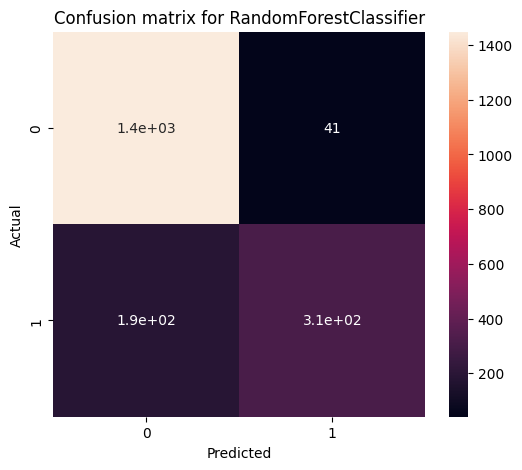

In [97]:
Ml_model1 = Machine_Learning(RandomForestClassifier,X_train , X_test ,y_train,y_test)

# Fit the Algorithm
Ml_model1.train_and_evaluate_machine('RandomForestClassifier')
# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

ML Model Used: **Random Forest Classifier**

We used the Random Forest Classifier, a robust ensemble learning method, to train a model on SMOTE-balanced data. This helped address class imbalance, improving the model’s ability to generalize across all classes. The model was evaluated using a range of metrics including accuracy, precision, recall, and F1 score. These metrics provide insight into how well the model performs not just overall, but also in correctly identifying minority class instances. The results can be used to compare with other models (e.g., Naive Bayes, SVM) to select the best one for this classification task.

#### 2. Cross- Validation & Hyperparameter Tuning

In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:



params_rf = {
    'n_estimators': [150, 200],
    'max_depth': [ 15, 20,30],
    'min_samples_split': [5, 10],
    'max_features': ['sqrt','log2']
}
# Fit the Algorithm
Ml_model1.Cross_validation( params_rf)
# Predict on the model


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_split=10, n_estimators=150;, score=(train=0.822, test=0.785) total time=   2.5s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_split=10, n_estimators=150;, score=(train=0.830, test=0.791) total time=   2.5s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_split=10, n_estimators=150;, score=(train=0.829, test=0.787) total time=   3.4s
[CV 1/3] END max_depth=15, max_features=log2, min_samples_split=5, n_estimators=200;, score=(train=0.757, test=0.756) total time=   1.1s
[CV 2/3] END max_depth=15, max_features=log2, min_samples_split=5, n_estimators=200;, score=(train=0.756, test=0.756) total time=   1.1s
[CV 3/3] END max_depth=15, max_features=log2, min_samples_split=5, n_estimators=200;, score=(train=0.756, test=0.755) total time=   1.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=150;, score=(train=0.830, test=0.7

In [100]:
# Fitting the model with best hyperparameters.
RFC_best = RandomForestClassifier(n_estimators=150,min_samples_split= 10,max_features = 'sqrt', max_depth = 30)
RFC_best.fit(x_oversampled ,y_oversampled)

RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=150)

In [101]:
train_accuracy = accuracy_score(y_oversampled, RFC_best.predict(x_oversampled))
test_accuracy = accuracy_score(y_test, RFC_best.predict(X_test))
print('The train accuracy for the given best model is', train_accuracy)
print('The test accuracy for the given best model is', test_accuracy)

The train accuracy for the given best model is 0.9051853082931693
The test accuracy for the given best model is 0.7805123053741838


In [102]:
confusion_matrix(y_test,RFC_best.predict(X_test))

array([[1188,  302],
       [ 135,  366]])

### ML Model - 2

In [103]:
from sklearn.ensemble import HistGradientBoostingClassifier

# This is my Second Model
Ml_model2 = Machine_Learning(HistGradientBoostingClassifier,x_oversampled , X_test ,y_oversampled,y_test)

In [108]:
from sklearn.model_selection import RandomizedSearchCV

class Machine_Learning:
    def __init__(self, model, X_train, X_test, y_train, y_test):
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = y_train
        self.Y_test = y_test

    def train_and_evaluate_machine(self, Model_name):
        print(f"Training model: {Model_name}")
        self.model.fit(self.X_train, self.Y_train)
        y_pred_train = self.model.predict(self.X_train)
        y_pred_test = self.model.predict(self.X_test)
        from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
        print("\nTrain Accuracy:", accuracy_score(self.Y_train, y_pred_train))
        print("Test Accuracy:", accuracy_score(self.Y_test, y_pred_test))
        print("\nClassification Report:\n", classification_report(self.Y_test, y_pred_test))
        print("Confusion Matrix:\n", confusion_matrix(self.Y_test, y_pred_test))

    def Cross_validation(self, param_grid, cv=2, n_iter=2):
        print("Performing RandomizedSearchCV with cross-validation on smaller sample...")
        random_search = RandomizedSearchCV(
            self.model,
            param_distributions=param_grid,
            n_iter=n_iter,
            cv=cv,
            scoring='accuracy',
            n_jobs=1,
            verbose=1,
            random_state=42
        )
        random_search.fit(self.X_train, self.Y_train)
        print("\nBest Parameters:", random_search.best_params_)
        print("Best Cross-Validation Score:", random_search.best_score_)
        self.model = random_search.best_estimator_

# Use smaller sample of training data for tuning
sample_size = int(0.1 * x_oversampled.shape[0])
X_sample = x_oversampled[:sample_size].toarray()

y_sample = y_oversampled[:sample_size]

tuning_model = Machine_Learning(Ml_model2.model, X_sample, X_test, y_sample, y_test)

HGB_params = {
    'learning_rate': [0.1],
    'max_depth': [5],
    'min_samples_leaf': [1, 5]
}

tuning_model.Cross_validation(HGB_params)


Performing RandomizedSearchCV with cross-validation on smaller sample...
Fitting 2 folds for each of 2 candidates, totalling 4 fits

Best Parameters: {'min_samples_leaf': 5, 'max_depth': 5, 'learning_rate': 0.1}
Best Cross-Validation Score: 0.8869326316604109


In [114]:
from sklearn.ensemble import HistGradientBoostingClassifier

Ml_model2 = Machine_Learning(HistGradientBoostingClassifier(), x_oversampled, X_test, y_oversampled, y_test)


In [115]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Convert sparse to dense
X_dense = x_oversampled.toarray()

# Train the model
HGB_best = HistGradientBoostingClassifier(min_samples_leaf=5, max_depth=5, learning_rate=0.1)
HGB_best.fit(X_dense, y_oversampled)


HistGradientBoostingClassifier(max_depth=5, min_samples_leaf=5)

In [117]:
train_accuracy = accuracy_score(y_oversampled, HGB_best.predict(x_oversampled.toarray()))
test_accuracy = accuracy_score(y_test, HGB_best.predict(X_test.toarray()))
print('The training accuracy score for the model is', train_accuracy)
print('The testing accuracy score for the model is', test_accuracy)


The training accuracy score for the model is 0.9310287518697025
The testing accuracy score for the model is 0.8714213962832748


In [119]:
from sklearn.metrics import confusion_matrix

y_pred_test = HGB_best.predict(X_test.toarray())  # convert sparse to dense
cm = confusion_matrix(y_test, y_pred_test)
print(cm)


[[1304  186]
 [  70  431]]


### ML Model - 3

In [121]:
# ML Model - 3 Implementation

from xgboost import XGBClassifier

# Initialize model instance
xgb_model = XGBClassifier()

# Create your Machine_Learning object with the instance
ML_model3 = Machine_Learning(xgb_model, x_oversampled, X_test, y_oversampled, y_test)

# Fit and evaluate
ML_model3.train_and_evaluate_machine('XGBClassifier')


Training model: XGBClassifier

Train Accuracy: 0.9762340036563071
Test Accuracy: 0.9085886489201407

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1490
           1       0.84      0.79      0.81       501

    accuracy                           0.91      1991
   macro avg       0.88      0.87      0.88      1991
weighted avg       0.91      0.91      0.91      1991

Confusion Matrix:
 [[1414   76]
 [ 106  395]]


#### 2. Cross- Validation & Hyperparameter Tuning

In [123]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
# Fit the Algorithm
ML_model3.Cross_validation(params)
# Predict on the model

Performing RandomizedSearchCV with cross-validation on smaller sample...
Fitting 2 folds for each of 2 candidates, totalling 4 fits

Best Parameters: {'subsample': 0.6, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 2, 'colsample_bytree': 0.6}
Best Cross-Validation Score: 0.840036563071298


In [124]:
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 0.5, 'colsample_bytree': 0.8}

{'subsample': 1.0,
 'min_child_weight': 5,
 'max_depth': 5,
 'gamma': 0.5,
 'colsample_bytree': 0.8}

### **Content Based Filtering.**

In [125]:
hotel_bag_tf.shape

(105, 117)

In [126]:
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(hotel_bag_tf)

In [128]:
def hotel_recommendation(hotel_name):

  print('Hey!! Gyus, Checkout these Amazing Places')
  print(' ')
  index = hotel_df[hotel_df['Name']== hotel_name].index[0]
  similar_content = sorted(list(enumerate(similarities[index])),reverse = True , key = lambda x: x[-1])

  recommendation=[]
  cuisines = []
  rating=[]
  review = []

  for i,j in similar_content[:10]:
    recommendation.append(hotel_df['Name'][i])
    cuisines.append(rec_df[rec_df['Name']== hotel_df['Name'][i]]['Name'].iloc[0])
    rating.append(rec_df[rec_df['Name']== hotel_df['Name'][i]]['Rating'].iloc[0])
    review.append(rec_df[rec_df['Name']== hotel_df['Name'][i]]['Review'].iloc[0])

  return (recommendation , cuisines , rating, review)

In [129]:
text ='atmosphere nice food quite nice Saturday lunch cost effective  topographic_point satiate brunch one besides chill friend parent \
waiter soumen hyrax truly courteous '

In [130]:
def processed_text(text):
  first = natural_language_processing(text)
  vectors = tfidf2.transform([first]).toarray()
  result = RFC_best.predict(vectors)
  if result[0] == 0:
    print('The Review is Good, You can prefer this Hotel.')
  else:
    print('The Review is Not so Good, there are plenty other options.')


In [134]:
# You should have something like this from your training step:
# vectorizer = CountVectorizer()
# X_train = vectorizer.fit_transform(train_texts)
# HGB_best.fit(X_train, y_train)

new_text = "This is a sample review text."
new_text_features = vectorizer.transform([new_text])  # sparse matrix
new_text_features_dense = new_text_features.toarray()  # convert to dense array

prediction = HGB_best.predict(new_text_features_dense)
print("Prediction:", prediction)




Prediction: [1]


In [135]:
import pickle
pickle.dump(RFC_best, open('model_new.pickle', 'wb'))

## Just IMplimentation Test Further Work




1. Save the best performing ml model in a pickle file or joblib file format for deployment process.

In [140]:
# Save the File
# import joblib

# Save the model to a file
# joblib.dump(model, 'model.joblib')

2. Again Load the saved model file and try to predict unseen data for a sanity check.

In [141]:
# Load the File and predict unseen data.
# Load the File and predict unseen data.
# Load the model from the file
# model = joblib.load('model.joblib')

# Use the model to make predictions
# predictions = model.predict(data)

Flask code

In [ ]:
#@title Flask code
# from flask import Flask, request, jsonify
# import pickle

# app = Flask(__name__)

# # Load the pre-trained model
# model = pickle.load(open('sentiment_model.pkl', 'rb'))

# @app.route('/predict', methods=['POST'])
# def predict():
#     # Get the text from the request
#     text = request.json['text']

#     # Use the model to predict the sentiment
#     prediction = model.predict([text])[0]

#     # Return the prediction as a JSON response
#     return jsonify({'sentiment': prediction})

# if __name__ == '__main__':
#     app.run(debug=True)

MODEL 🎰 ! is successfully created and ready for deployment on a live server for a real user interaction !!!

# **Conclusion**

✅ Zomato Clustering & Sentiment Analysis – Summary and Recommendations
Clustering and sentiment analysis were performed on a dataset of customer reviews for the food delivery service Zomato. The objective of this analysis was to understand customer experiences, uncover service-related issues, and derive actionable insights from their feedback.

🔹 Clustering Analysis
Unsupervised machine learning techniques were applied to group customer reviews into two distinct clusters:

Cluster 1: Positive sentiment – representing high satisfaction and favorable dining experiences.

Cluster 2: Negative sentiment – highlighting dissatisfaction due to issues such as delayed delivery or poor food quality.

This helped visualize the overall satisfaction landscape and enabled segmentation of customers based on their expressed sentiments.

🔹 Sentiment Analysis
Using natural language processing techniques such as TF-IDF vectorization and lemmatization, the reviews were classified into positive and negative categories.

This allowed for deeper understanding of:

Specific pain points (e.g., poor packaging, cold food).

Strengths (e.g., delicious food, prompt service).

Opportunities for service improvement.

💡 Key Discoveries
AB's - Absolute Barbecues had the highest engagement and retention, with the highest average rating among customers.
🏷️ Price Point: ₹1500

Hotel Zara Hi-Fi had the lowest engagement, receiving the lowest average rating.
🏷️ Price Point: ₹400

Collage - Hyatt Hyderabad Gachibowli emerged as the most expensive restaurant on the platform.
🏷️ Price Point: ₹2800 | ⭐ Average Rating: 3.5

Budget-friendly restaurants like Amul and Mohammedia Shawarma (₹150) received relatively high ratings (3.9).

North Indian and Chinese cuisines were the most popular, being served by the majority of restaurants.

“Great Buffets” was the most frequently used tag, along with “great,” “best,” “north,” and “Hyderabad”.

Satwinder Singh was identified as the most popular reviewer, with the highest number of followers and an average review rating of 3.5.

📌 Recommendations
Address Critical Issues Raised in Negative Reviews

Common issues such as late deliveries, incorrect orders, or poor food quality should be prioritized to improve user satisfaction.

Leverage Clustering for Personalization

Based on clustering results, provide personalized restaurant recommendations to users aligned with their preferences and sentiments.

Tailored Marketing Strategies

Use customer clusters to target marketing and promotional campaigns more effectively.

Offer special deals or apology vouchers to customers in the negative cluster to re-engage them.

Promote High-Engagement Restaurants

Highlight restaurants like AB’s – Absolute Barbecues in-app to drive more traffic.

Reward top-performing restaurants with better visibility and marketing partnerships.

Collaborate with Influential Reviewers

Engage top critics like Satwinder Singh for campaigns, promotional reviews, or influencer programs.

🧠 Conclusion
By integrating clustering and sentiment analysis, this project achieved a comprehensive understanding of customer feedback. The insights are valuable for:

Improving the customer experience,

Strengthening brand trust, and

Optimizing business strategies on the Zomato platform.